In [1]:
import os
import sys
from collections import Counter

from gensim.models import KeyedVectors

from image.captioning.captioner import Captioner
from image.encoder import ImageEncoder
from text.summarizer import CaptionSummarizer
from common.space import Space
from config import w2v_file, vocab_limit
from config import checkpoint_path, word_map_path, device
from config import stop_words
from config import google_open_images_folder

# sys.path.append(os.path.join(sys.path[0],'image','captioning')) # add models.py

In [2]:
keyed_vectors = KeyedVectors.load_word2vec_format(w2v_file, limit=vocab_limit, binary=True)
space = Space(keyed_vectors)

2019-12-20 10:32:12,703 gensim.models.utils_any2vec: INFO loading projection weights from ~/Downloads/GoogleNews-vectors-negative300.bin.gz
2019-12-20 10:32:58,057 gensim.models.utils_any2vec: INFO loaded (1000000, 300) matrix from ~/Downloads/GoogleNews-vectors-negative300.bin.gz


In [3]:
keywords1 = Counter(['king'])
keywords2 = Counter(['king'])

In [4]:
ss1 = space.create_subspace(keywords=keywords1, dims=5)
ss2 = space.create_subspace(keywords=keywords2, dims=5)

In [5]:
space.subspaces_similarity(ss1, ss2)

1.0

In [6]:
captioner = Captioner(checkpoint_path, word_map_path, device)
summarizer = CaptionSummarizer(stop_words=stop_words)
image_encoder = ImageEncoder(captioner=captioner, summarizer=summarizer, space=space)

In [19]:
def test_subspace_from_image(image_filename: str):
    captions: list = image_encoder._get_captions(image_filename)
    print(captions)
    keywords: Counter = image_encoder._get_keywords(captions)
    print(keywords)
    word_subspace = image_encoder.create_subspace(image_filename)
    return word_subspace

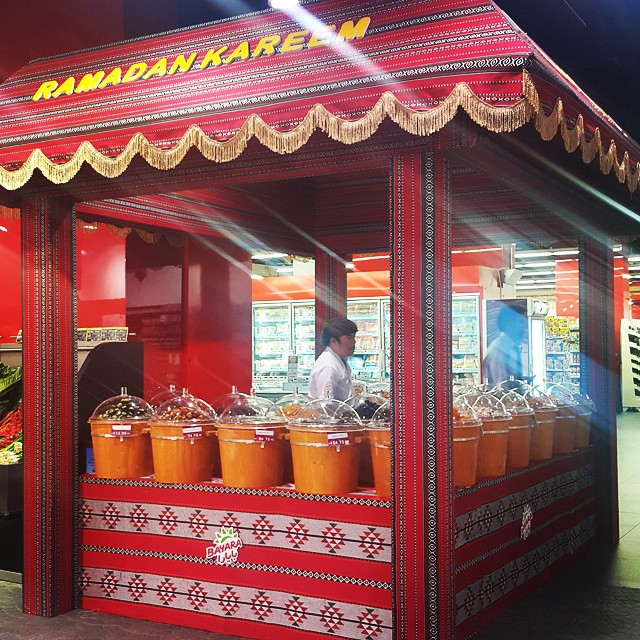

In [61]:
from random import randint
from IPython.display import Image as ImageOpener, display
r = randint(0, 10)
image_filename = os.path.join(google_open_images_folder, os.listdir(google_open_images_folder)[r])
display(ImageOpener(image_filename))

In [62]:
ws = test_subspace_from_image(image_filename)

['a large red and white bed with a red blanket', 'a red and white bed with a red cover', 'a red and white bed with a red cover', 'a red and white bed with a red cover', 'a red and white bed with a red cover']
Counter({'red': 1, 'cover': 1, 'blanket': 1, 'large': 1, 'bed': 1, 'white': 1})


In [63]:
k = Counter({'plant': 1, 'garden': 1, 'tree':1})
ws_t = space.create_subspace(keywords=k, dims=5)

In [64]:
space.subspaces_similarity(ws_t, ws)

0.068850264